In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
ads = pd.read_csv("Social_Network_Ads.csv")
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ads.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
#split data into dependent and independent variable
#eliminate userid adn gender
x = ads[['Age', 'EstimatedSalary']]
y = ads['Purchased']

In [5]:
#standard scaler
sc = StandardScaler()
x = sc.fit_transform(x)#standarizing age and salary since there is huge dfiference

In [6]:
#train_tes_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
#logistic regression
lr = LogisticRegression(C=1.0, solver = 'liblinear', multi_class='ovr')

In [12]:
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [29]:
def plot_Scatter(x,y):
  #visualization
  output=['Not Purchased','Purchased']
  #meshgrid
  x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),
              np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01))
  #to plot the boundaries
  #countourf>>>>is used to display 3 dimensions in a 2d plot
  #2>>>axes,,,3>>>color
  cmap = ['#f1674f','#beddb7']
  plt.figure(figsize=(7,7))
  plt.contourf(x1,x2,lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
              alpha=0.75,cmap=ListedColormap(cmap))

  plt.xlim((x1.min(),x1.max()))
  plt.ylim((x2.min(),x2.max()))

  for i, j in enumerate(set(y)):    #[(0,0),(1,1)]
    plt.scatter(x[y==j,0],x[y==j,1],c=['#F84C51','#23807A'][i],label=output[j])
  plt.title('logistic regression')
  plt.xlabel('Age')
  plt.ylabel('estimated salary')
  plt.legend()


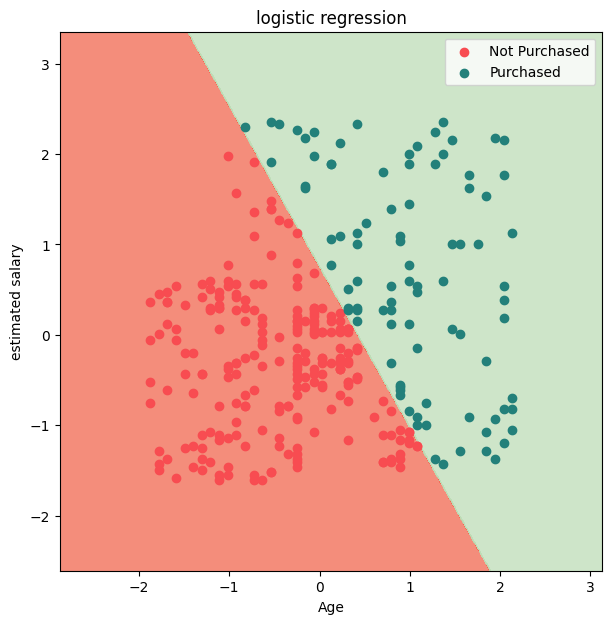

In [28]:
#training set
y_pred=lr.predict(x_train)
plt.show(plot_Scatter(x_train,y_pred))

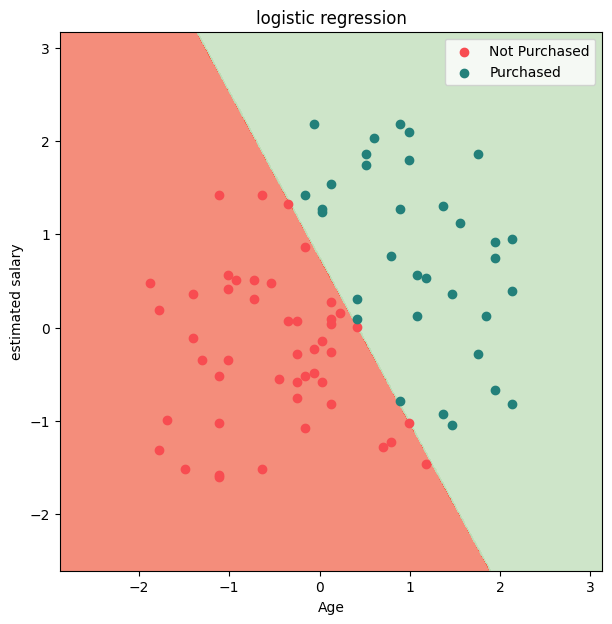

In [30]:
#test set
y_pred=lr.predict(x_test)
plt.show(plot_Scatter(x_test,y_pred))

In [26]:
#accuracy score
accuracy_score(y_test,y_pred)

0.8375